# **K-Means**


In [17]:
import pandas as pd
import numpy as np
from sklearn import tree
import time
from sklearn.preprocessing import LabelEncoder
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [19]:
# Drop rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)


In [20]:
# Use LabelEncoder to encode categorical variables to numeric values
le_sex = LabelEncoder()
le_smoke = LabelEncoder()
#le_diabetes = LabelEncoder()
df['gender'] = le_sex.fit_transform(df['gender'])
df['smoking_history'] = le_smoke.fit_transform(df['smoking_history'])
#df['diabetes'] = le_diabetes.fit_transform(df['diabetes'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [21]:
print(df.dtypes)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [22]:
# Dividir os dados em conjunto de treinamento e teste
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85
...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,4,32.98,5.7,80
54886,0,15.0,0,0,4,28.10,5.0,159
76820,1,42.0,0,0,4,26.14,5.8,85
860,0,37.0,0,0,4,24.96,6.2,158


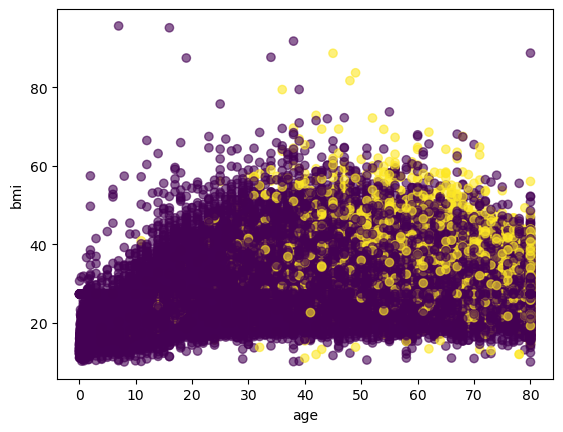

In [23]:
plt.scatter(df['age'], df['bmi'], c=df['diabetes'], alpha=0.6)
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [24]:
# Normalizando os dados
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [26]:
km = KMeans(n_clusters=2,n_init=10)
km.fit(scaled_X_train)

KMeans(n_clusters=2)

In [27]:
y_train_pred = km.predict(scaled_X_train)
y_test_pred = km.predict(scaled_X_test)
y_train_pred.shape

(80000,)

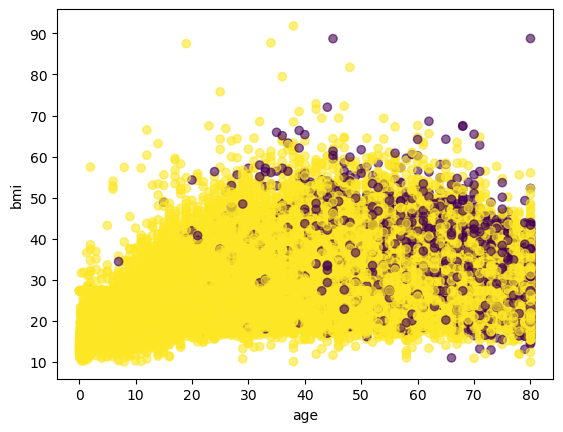

In [28]:
# Visualizando os clusters
plt.scatter(X_train['age'], X_train['bmi'], c=y_train_pred, alpha=0.6)
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [29]:
# Create an instance of the DecisionTreeClassifier
model = tree.DecisionTreeClassifier(max_depth=22, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=22)

# Treinar o modelo de árvore de decisão usando os dados de treinamento
start = time.time()
model.fit(X_train, y_train)
tempo = time.time() - start
print(tempo)

0.17577219009399414


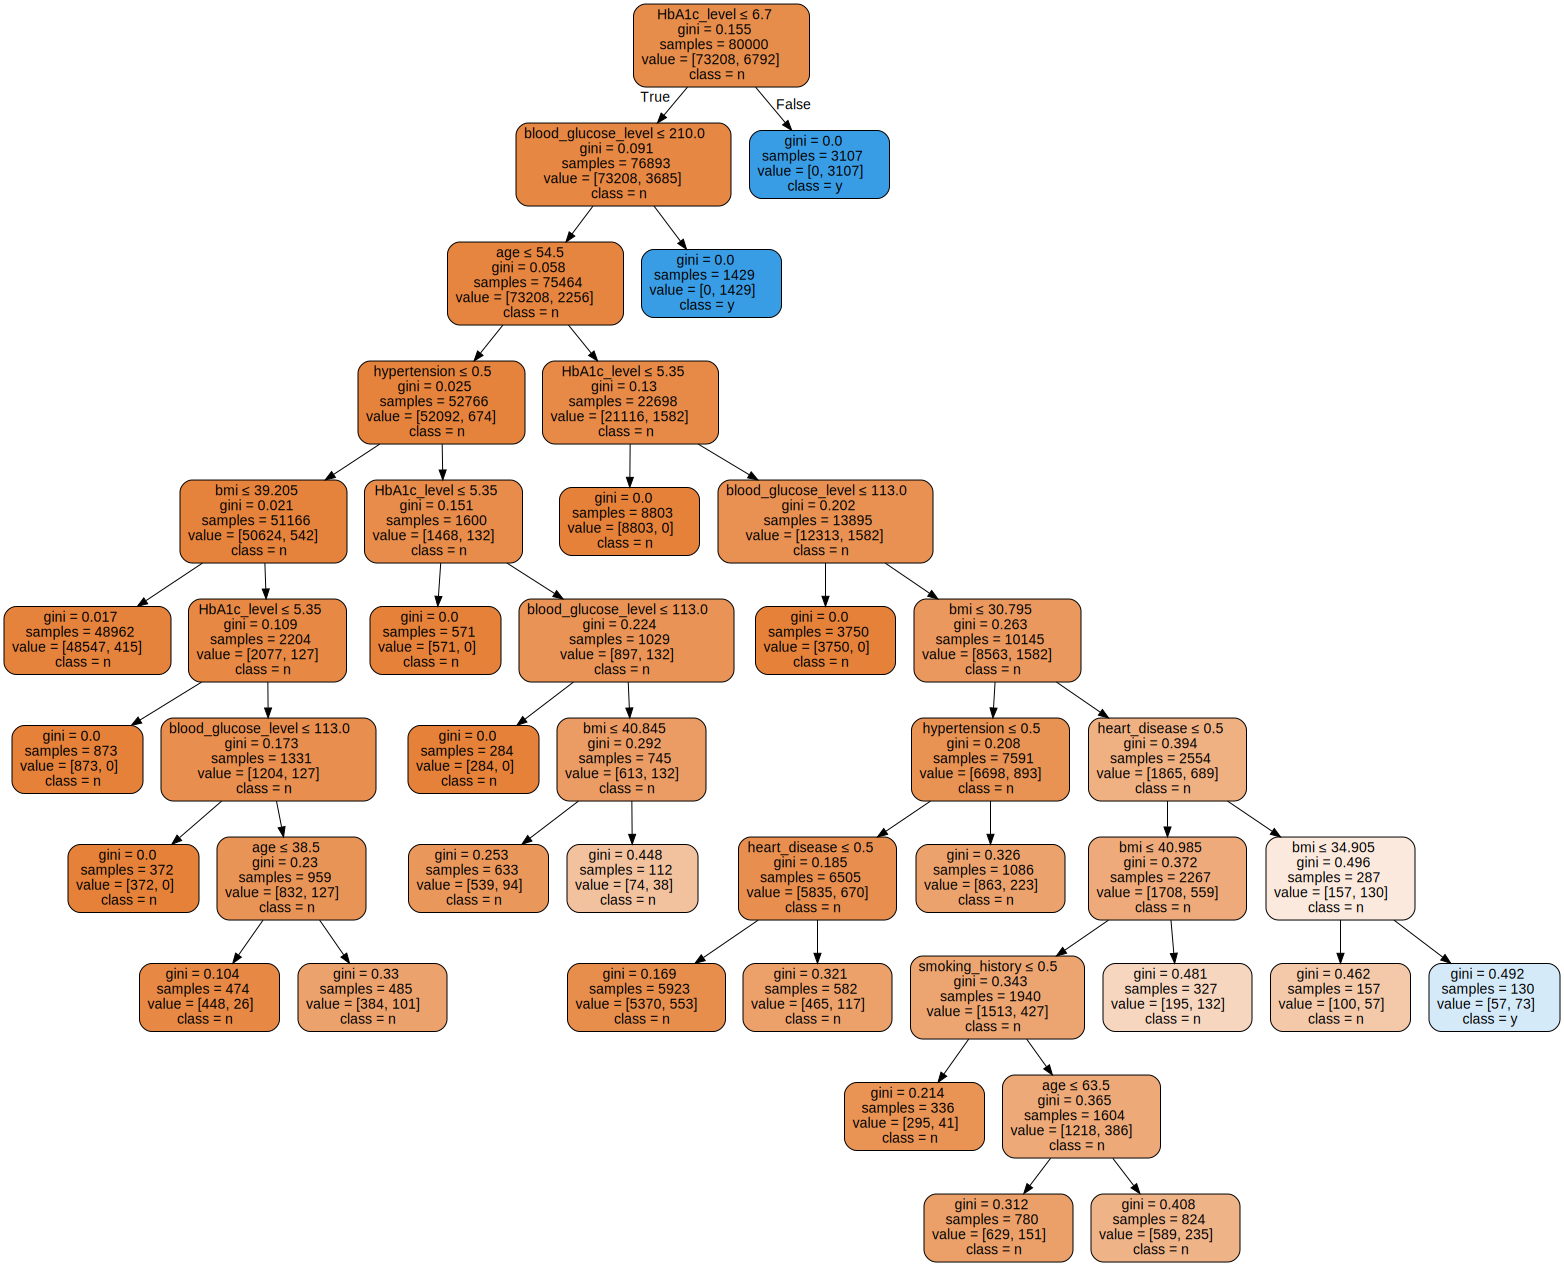

In [30]:
# Export the decision tree as a Graphviz object
feature_names = ['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']

target_names = ['n', 'y']

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.view()
graph

In [31]:
# Calcular a pontuação de precisão do modelo nos dados de teste
print(f'Training accuracy tree: {model.score(X_train, y_train)*100}%')
print(f'Testing accuracy tree: {model.score(X_test, y_test)*100}%')

Training accuracy tree: 97.2%
Testing accuracy tree: 97.22%


In [32]:
# Calculate the accuracy
accuracy_train = np.sum(y_train_pred == y_train) / len(y_train)
accuracy_test = np.sum(y_test_pred == y_test) / len(y_test)

print(f'Training accuracy k-means: {accuracy_train * 100}%')
print(f'Testing accuracy k-means: {accuracy_test * 100}%')

Training accuracy k-means: 13.08875%
Testing accuracy k-means: 12.73%
